# Parcial Big Data
**Nombre:** Juan Manuel Gutiérrez Gómez - **Código**: 2260563

## Proceso de limpieza de datos

### Manejo de valores faltantes

Primero hacemos las importaciones necesarias para la limpieza de datos de valores faltantes o nulos:

In [1]:
import numpy as np
import pandas as pd

Leemos la data con la ayuda de pandas

In [2]:
data_training = pd.read_csv('DataParcial/data_Training/data_training.csv')
Places = pd.read_csv('DataParcial/data_Training/Places.csv')
users = pd.read_csv('DataParcial/data_Training/UsersTraining/usuarios.csv')

Revisamos algunos registros de los dataset para comprobar si faltan datos, es un viztazo general

In [3]:
data_training.sample(5)

,Index,Gender,Place,Location,Date,Type,Label
208,Usuario1167,Male,Islas Marietas,Noroeste,marzo de 2016,Family,5
1440,Usuario2029,Female,Splash Water Park,Reino Unido,marzo de 2017,Family,3
1446,Usuario1589,Male,Mercado del Pueblo Sayulita,Chile,marzo de 2017,Family,3
518,Usuario1504,Female,Manantial La Tovara,Canada,febrero de 2017,Friends,5
466,Usuario1239,Male,Islas Marietas,Occidente,diciembre de 2013,Business,5


In [4]:
Places.sample(5)

,Lugar,Descripción,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
2,Bucerias Art Walk,cultural|diversion,Hogar de uno de los paseos artísticos más sing...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Santuario de Cocodrilos El Cora,ecoturismo,Ubicado en el corazón del manglar en el Estero...,a un costado del Club de Golf Flamingos,se localiza el Cocodrilario Santuario de Cocod...,un espacio natural que se ha renovado con más ...,NaN,NaN,NaN,NaN
5,Isla de Coral,Turismo de sol y playa|ecoturismo,Localizada en el municipio de Compostela,Nayarit,en la conocida como Bahía de Jaltemba,la Isla del Coral semeja un acuario natural de...,tortugas,estrellas de mar,y peces multicolores.,NaN
11,Playa El Anclote,Turismo de sol y playa,Playa El anclote es un espectacular lugar de l...,dicha playa se reconocida por su belleza virge...,NaN,NaN,NaN,NaN,NaN,NaN
9,Mexcaltitan,Naturaleza,Mexcaltitán es una localidad del municipio de ...,Nayarit (México). La localidad se asienta sobr...,mezcal,y titlán,"riqueza, abundancia.",NaN,NaN,NaN


In [5]:
users.sample(5)

,"La playa, sencillamente es hermosa, mis hijos y yo verdaderamente disfrutamos este lugar... Primero tenía cierto temor por lo qie había escuchado del lugar, per...",4.0,Sayulita Beach,4.0.1
11938,desconocido,40.4,Puerto Vallarta,40.4
14216,People said it is a must in punta arenas. I wa...,3.0,Cementerio Municipal,4.5
16431,El servicio es excelente me encanta ir por que...,5.0,Beef Capital Irapuato,4.0
4828,Ok it has plastic patio furniture and its outs...,5.0,L'Angolo di Napoli,4.5
22246,We visited Bella Vineyards last week and were ...,5.0,Bella Vineyards and Wine Caves,4.5


Imprimimos los valores totales de nulos en cada columna del dataset:

In [6]:
print(data_training.isnull().sum())

Index       0
Gender      0
Place       0
Location    0
Date        0
Type        0
Label       0
dtype: int64


Podemos ver que el dataset de entrenamiento no tiene valores nulos.

In [7]:
print(Places.isnull().sum())

Lugar           0
Descripción     0
Unnamed: 2      0
Unnamed: 3      3
Unnamed: 4      5
Unnamed: 5      9
Unnamed: 6     12
Unnamed: 7     15
Unnamed: 8     16
Unnamed: 9     17
dtype: int64


En este dataset vemos que se encuentran varios valores nulos, esto da a entender que el dataset tiene columnas que no se están usando y debe ser limpiado. Además de nombrar las columnas de descripciones.

In [8]:
Places.fillna('Sin descripcion', inplace=True)

In [9]:
print(Places.isnull().sum())

Lugar          0
Descripción    0
Unnamed: 2     0
Unnamed: 3     0
Unnamed: 4     0
Unnamed: 5     0
Unnamed: 6     0
Unnamed: 7     0
Unnamed: 8     0
Unnamed: 9     0
dtype: int64


In [10]:
Places.head()

,Lugar,Descripción,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Bahia de Matanchen,Turismo de sol y playa,Se localiza en el municipio de San Blas a 70.5...,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion
1,Playa Los Muertos,Turismo de sol y playa,En Puerto Vallarta,cerca del Río Cuale,a unos metros del malecón,se encuentra esta playa,con una extensión de 2 kilómetros de largo. Es...,Sin descripcion,Sin descripcion,Sin descripcion
2,Bucerias Art Walk,cultural|diversion,Hogar de uno de los paseos artísticos más sing...,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion
3,Centro Historico de Tepic,cultural|religioso,La capital del Estado de Nayarit,es una ciudad colonial que se encuentra rodead...,posee riquezas naturales y está llena de cultu...,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion
4,Galerias Vallarta,diversion,En Galerías Vallarta contamos con todas las me...,Boutiques,Cine.,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion


Renombrando las columnas sin nombre:

In [11]:
Places.columns = ['Lugar', 'Descripción', 'Descripción', 'Descripción', 'Descripción', 'Descripción', 'Descripción', 'Descripción', 'Descripción', 'Descripción',]

In [12]:
Places.head()

,Lugar,Descripción,Descripción,Descripción,Descripción,Descripción,Descripción,Descripción,Descripción,Descripción
0,Bahia de Matanchen,Turismo de sol y playa,Se localiza en el municipio de San Blas a 70.5...,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion
1,Playa Los Muertos,Turismo de sol y playa,En Puerto Vallarta,cerca del Río Cuale,a unos metros del malecón,se encuentra esta playa,con una extensión de 2 kilómetros de largo. Es...,Sin descripcion,Sin descripcion,Sin descripcion
2,Bucerias Art Walk,cultural|diversion,Hogar de uno de los paseos artísticos más sing...,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion
3,Centro Historico de Tepic,cultural|religioso,La capital del Estado de Nayarit,es una ciudad colonial que se encuentra rodead...,posee riquezas naturales y está llena de cultu...,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion
4,Galerias Vallarta,diversion,En Galerías Vallarta contamos con todas las me...,Boutiques,Cine.,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion,Sin descripcion


In [13]:
print(users.isnull().sum())

La playa, sencillamente es hermosa, mis hijos y yo verdaderamente disfrutamos este lugar... Primero tenía cierto temor por lo qie había escuchado del lugar, per...     0
4.0                                                                                                                                                                     1
Sayulita Beach                                                                                                                                                          1
4.0.1                                                                                                                                                                  29
dtype: int64


Como podemos ver, el dataset no tiene el nombre de las columnas y es algo importante que hay que solucionar.

In [14]:
users.columns = ['description', 'user_rating', 'place', 'global_rating']

In [15]:
print(users.isnull().sum())

description       0
user_rating       1
place             1
global_rating    29
dtype: int64


En este caso el daño es menor, no hay muchos valores nulos, un usuario que no calificó el sitio turístico, un usuario que que no especificó el lugar y valores del global a los que no se les asignó una calificación global.

In [16]:
# Calulamos un promedio de las calificaciones para asignarselo a los valores nulos
user_rating_mean = users['user_rating'].mean()
users['user_rating'].fillna(user_rating_mean, inplace=True)
users['place'].fillna('', inplace=True)
# Calulamos un promedio de las calificaciones globales para asignarselo a los valores nulos
global_rating_mean = users['global_rating'].mean()
users['global_rating'].fillna(global_rating_mean, inplace=True)

In [17]:
print(users.isnull().sum())

description      0
user_rating      0
place            0
global_rating    0
dtype: int64


In [18]:
users.head()

,description,user_rating,place,global_rating
0,Hermoso lugar... Aunque muy fría el agua... Mu...,4.0,Balneario Agua Fría,4.0
1,La cerdad vale la pena visitar eate lugar... C...,4.0,Los Molcajetes de Villa,4.5
2,"Debes visitar ""La Casa de Piedra"", ambiente mu...",4.0,La Casa de Piedra,4.0
3,Hola amig@s... Este es realmente un buen lugar...,4.0,Zoológico Guadalajara,4.5
4,Es un lugar muy tradicional en Mazatlán... exc...,4.0,El Muchacho Alegre,4.0


### Escalado Variables

Esto significa que está transformando sus datos para que se ajusten a una escala específica, como 0-100 o 0-1. Escalar los datos cuando usa métodos basados en medidas de qué tan separados están los puntos de datos, como máquinas de vectores de soporte, SVM, k-vecinos más cercanos o KNN. Con estos algoritmos, se le da la misma importancia a un cambio de "1" en cualquier característica numérica.

Al escalar las variables, puede ayudar a comparar diferentes variables en igualdad de condiciones. Para ayudar a solidificar cómo se ve la escala.

In [19]:
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\JuanMa\anaconda3\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Futur

Text(0.5, 1.0, 'Data Escalada')

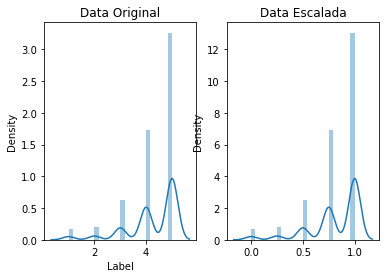

In [20]:
# Seleccionamos la columna Label para hacer el escalado en data_training.csv
label_scaled = data_training.Label

scaled_data = minmax_scaling(label_scaled, columns = [0])

fig, ax=plt.subplots(1,2)
sns.distplot(data_training.Label, ax=ax[0])
ax[0].set_title("Data Original")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Data Escalada")

C:\Users\JuanMa\anaconda3\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Futur

Text(0.5, 1.0, 'Data Escalada')

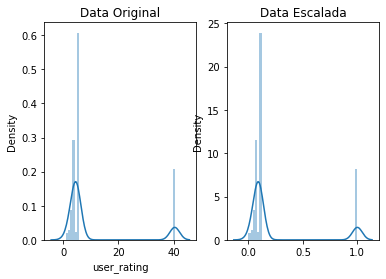

In [21]:
# Seleccionamos la columna user_rating para hacer el escalado en data_training.csv
user_rating_scaled = users.user_rating

scaled_data = minmax_scaling(user_rating_scaled, columns = [0])

fig, ax=plt.subplots(1,2)
sns.distplot(users.user_rating, ax=ax[0])
ax[0].set_title("Data Original")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Data Escalada")

C:\Users\JuanMa\anaconda3\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, Futur

Text(0.5, 1.0, 'Data Escalada')

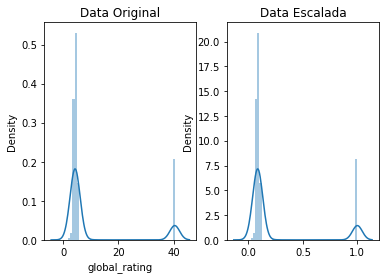

In [22]:
# Seleccionamos la columna global_rating para hacer el escalado en data_training.csv
global_rating_scaled = users.global_rating

scaled_data = minmax_scaling(global_rating_scaled, columns = [0])

fig, ax=plt.subplots(1,2)
sns.distplot(users.global_rating, ax=ax[0])
ax[0].set_title("Data Original")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Data Escalada")

### Normalización de Datos

In [23]:
from scipy import stats

C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

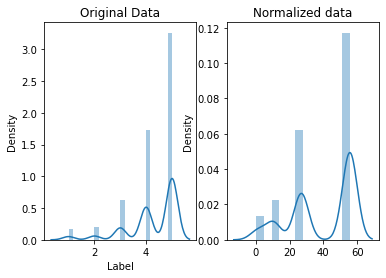

In [24]:
# Normalización de la data para las Etiquetas "Label" en el dataset de entrenamiento
label_scaled = data_training.Label > 0

positive_Labels = data_training.Label.loc[label_scaled]

normalized_Labels = stats.boxcox(positive_Labels)[0]

fig, ax=plt.subplots(1,2)
sns.distplot(positive_Labels, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_Labels, ax=ax[1])
ax[1].set_title("Normalized data")

C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

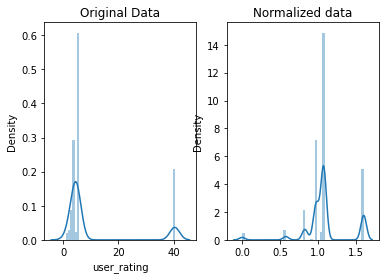

In [25]:
# Normalización de la data para las Calificaciones del usuario "user_rating" en el dataset de usuarios
user_rating_scaled = users.user_rating > 0

positive_user_rating = users.user_rating.loc[user_rating_scaled]

normalized_user_rating = stats.boxcox(positive_user_rating)[0]

fig, ax=plt.subplots(1,2)
sns.distplot(positive_user_rating, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_user_rating, ax=ax[1])
ax[1].set_title("Normalized data")

C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\JuanMa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

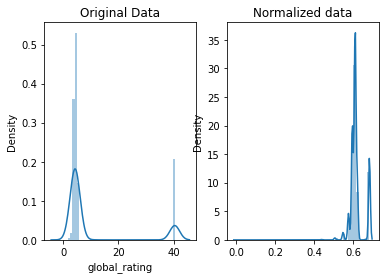

In [26]:
# Normalización de la data para las Calificaciones globales "global_rating" en el dataset de usuarios
global_rating_scaled = users.global_rating > 0

positive_global_rating = users.global_rating.loc[global_rating_scaled]

normalized_global_rating = stats.boxcox(positive_global_rating)[0]

fig, ax=plt.subplots(1,2)
sns.distplot(positive_global_rating, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_global_rating, ax=ax[1])
ax[1].set_title("Normalized data")

## Estrategia para desarrollar el sistema de recomendación

El diseño propueto es el de un sistema de recomendación basado en contenido, el cual se basará en las descripciones y las calificaciones de los usuarios a los sitios turísticos recopilados. Este método utiliza atributos del contenido para recomendar contenidos similares. No tiene un problema de arranque en frío porque funciona a través de atributos o etiquetas del contenido por lo que se pueden recomendar nuevos destinos de inmediato.

Basándome en esto, se hará un filtrado basado en el contenido para un sistema de recomendación de destinos turísticos. Se usarán algunas de las librerías más importantes de Python como **sklearn, nltk, numpy, pandas** entre otras que ayudarán a procesar la data y construir las recomendaciones.

## Desarrollo e implementación del sistema de recomendación

Importaciones más relevantes:

In [27]:
import re
import string
import random
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

Visualizamos la data nuevamente, esta vez, la data ya está limpia y lista para usarse en el sistema de recomendación

In [28]:
users

,description,user_rating,place,global_rating
0,Hermoso lugar... Aunque muy fría el agua... Mu...,4.000000,Balneario Agua Fría,4.000000
1,La cerdad vale la pena visitar eate lugar... C...,4.000000,Los Molcajetes de Villa,4.500000
2,"Debes visitar ""La Casa de Piedra"", ambiente mu...",4.000000,La Casa de Piedra,4.000000
3,Hola amig@s... Este es realmente un buen lugar...,4.000000,Zoológico Guadalajara,4.500000
4,Es un lugar muy tradicional en Mazatlán... exc...,4.000000,El Muchacho Alegre,4.000000
...,...,...,...,...
23865,Jess did a splendid job as our guide. Loved le...,5.000000,Devour Paris,5.000000
23866,We had the small group Louvre tour with Lauren...,5.000000,City Wonders,4.500000
23867,We went here once for dessert when the snooty ...,5.000000,Zizi,3.500000
23868,Good crepes with friendly service. The waitres...,5.000000,Le Dos d'Ane,4.500000


Inseramos el 'id' como nombre para la primera columna, esto servira de identificador para cada registro.

In [29]:
users.insert(0,'id',range(0,users.shape[0]))
users

,id,description,user_rating,place,global_rating
0,0,Hermoso lugar... Aunque muy fría el agua... Mu...,4.000000,Balneario Agua Fría,4.000000
1,1,La cerdad vale la pena visitar eate lugar... C...,4.000000,Los Molcajetes de Villa,4.500000
2,2,"Debes visitar ""La Casa de Piedra"", ambiente mu...",4.000000,La Casa de Piedra,4.000000
3,3,Hola amig@s... Este es realmente un buen lugar...,4.000000,Zoológico Guadalajara,4.500000
4,4,Es un lugar muy tradicional en Mazatlán... exc...,4.000000,El Muchacho Alegre,4.000000
...,...,...,...,...,...
23865,23865,Jess did a splendid job as our guide. Loved le...,5.000000,Devour Paris,5.000000
23866,23866,We had the small group Louvre tour with Lauren...,5.000000,City Wonders,4.500000
23867,23867,We went here once for dessert when the snooty ...,5.000000,Zizi,3.500000
23868,23868,Good crepes with friendly service. The waitres...,5.000000,Le Dos d'Ane,4.500000


Insertamos el dataset dentro de una variable para poder trabajarla en el sistema de recomendación. Imprimimos la forma del la data

In [30]:
df = users[['description', 'user_rating', 'place', 'global_rating']]
df.shape

(23870, 4)

In [31]:
df = df.dropna()

In [32]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

In [33]:
df.insert(0,'id',range(0,df.shape[0]))

In [34]:
df.shape

(14822, 5)

In [35]:
df.head()

,id,description,user_rating,place,global_rating
0,0,Hermoso lugar... Aunque muy fría el agua... Mu...,4.0,Balneario Agua Fría,4.0
1,1,La cerdad vale la pena visitar eate lugar... C...,4.0,Los Molcajetes de Villa,4.5
2,2,"Debes visitar ""La Casa de Piedra"", ambiente mu...",4.0,La Casa de Piedra,4.0
3,3,Hola amig@s... Este es realmente un buen lugar...,4.0,Zoológico Guadalajara,4.5
4,4,Es un lugar muy tradicional en Mazatlán... exc...,4.0,El Muchacho Alegre,4.0


In [36]:
# Función para eliminar los caracteres no ASCII
# def _removeNonAscii(s):
#    return "".join(i for i in s if  ord(i)<128)

# Función de conversión a minúsculas
def make_lower_case(text):
    return text.lower()

# Función de eliminación de palabras vacías
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    texts = [w for w in text if w.isalpha()]
    texts = " ".join(texts)
    return texts

# Función para eliminar la puntuación
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Aplicando todas las funciones en la descripción y almacenando como clean_desc
# df['cleaned_desc'] = ds['text'].apply(_removeNonAscii)
df['cleaned_desc'] = df['place'].apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)

In [37]:
# analizador para seleccionar palabras individuales por defecto 
# max_df[0.0,1.0] - se utiliza para ignorar las palabras con una frecuencia superior a 0.8 estas palabras pueden ser palabras inútiles ya que estas palabras pueden aparecer sólo una vez y pueden no tener un significado significativo
# min_df -- razón similar a la anterior 
# use_idfbool, default=True -- Habilitar la reponderación de la frecuencia inversa del documento.

tf = TfidfVectorizer(analyzer='word',stop_words='english',max_df=0.8,min_df=0.0,use_idf=True,ngram_range=(1,3))
tfidf_matrix = tf.fit_transform(df['cleaned_desc'])    

In [38]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [39]:
def recomendation(idx, no_of_rating_opinion):
    
    # obtener valores de similitud con otras descripciones
    similarity_score = list(enumerate(cosine_similarities[idx]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    
    # Obtenga las puntuaciones de los n descripciones más similares. Ignora la primera opinión.
    similarity_score = similarity_score[1:no_of_rating_opinion + 1]
    
    print("Lugar: " + df['place'].iloc[idx] + "\nDescripción: "+ df['description'].iloc[idx])
    print(" \n ")
    opinion_indices = [i[0] for i in similarity_score]
    for i in range(len(opinion_indices)):
        print("Índice de Recomendación: " + str(i + 1) + str(opinion_indices[i]) + " \nRating del usuario:  " + str(df['user_rating'].iloc[opinion_indices[i]]) + "\nLugar: " +
              df['place'].iloc[opinion_indices[i]] + "\nDescripción: "+ df['description'].iloc[opinion_indices[i]] +"\nScore: "+ str(similarity_score[i][1]))
        print()

In [40]:
idx=88 #min_df=0,2 -- forma: 1496 filas × 31 columnas
no_of_rating_opinion=10
recomendation(idx, no_of_rating_opinion)

Lugar: Palihouse Santa Barbara
Descripción: This a beautiful property with easy, accessible underground parking. Front desk clerk was very nice and welcoming. The first thing I typically notice about a ho...
 
 
Índice de Recomendación: 11896 
Rating del usuario:  4.0
Lugar: Santa Barbara Cenotes & Restaurant
Descripción: Los cenotes son bonitos . El lugar c tiene un estacionamiento palapa tipo loby de hotel t un gran restaurante . Muy bien acondicionado aunque en lonpersonal me ...
Score: 0.3639368248620875

Índice de Recomendación: 27988 
Rating del usuario:  5.0
Lugar: Santa Fe
Descripción: This is our 4 th year going to Saint Barths for a week and having lunch here and it is superb. We recommend you come for lunch because of the view- I am pretty ...
Score: 0.13023261628515645

Índice de Recomendación: 311991 
Rating del usuario:  5.0
Lugar: Santa Clara
Descripción: Con toda la deliciosa variedad que tienen ves y vuelves a ver y no sabes decidirte por cual, eso si todas elaboradas 

In [41]:
idx=69  #min_df=0,1 -- forma: 1496 filas × 144 columnas
no_of_rating_opinion=10
recomendation(idx, no_of_rating_opinion)

Lugar: FollowMi Around
Descripción: Quite good! I deeply recommend it, a particular highlight is the visit to the last supper alternate, a nice visit from Roman time to modern time.
 
 
Índice de Recomendación: 10 
Rating del usuario:  4.0
Lugar: Balneario Agua Fría
Descripción: Hermoso lugar... Aunque muy fría el agua... Muy recomendable para visitar con la familia y amigos... Debes visitarlo cuando estés es Colima...!!!
Score: 0.0

Índice de Recomendación: 21 
Rating del usuario:  4.0
Lugar: Los Molcajetes de Villa
Descripción: La cerdad vale la pena visitar eate lugar... Comida excelente y un agradable ambiente... Sin duda un lygar al que no debes faltar...!!!
Score: 0.0

Índice de Recomendación: 32 
Rating del usuario:  4.0
Lugar: La Casa de Piedra
Descripción: Debes visitar "La Casa de Piedra", ambiente muy agradable y limpio. Vale la pena que des una vuelta y disfrutes de su comida.
Score: 0.0

Índice de Recomendación: 43 
Rating del usuario:  4.0
Lugar: Zoológico Guadalajara
Des

## Aplicación del sistema de recomendación a la Data de Pruebas

In [42]:
users_test = pd.read_csv('DataParcial/data_test/UsuariosPrueba/users.csv')

In [43]:
users_test

,desconocido,4.0,Cabot Head Lighthouse,4.0.1
0,desconocido,4.0,Cabot Head Lighthouse,4.0
1,desconocido,4.0,Cabot Head Lighthouse,4.0
2,desconocido,4.0,Cabot Head Lighthouse,4.0
3,desconocido,4.0,Cabot Head Lighthouse,4.0
4,desconocido,4.0,Cabot Head Lighthouse,4.0
...,...,...,...,...
11487,This park is older but everything is in workin...,4.0,Aquaventuras Park,4.0
11488,The Malecon stretches from The south end of ho...,5.0,Malecón Boardwalk,4.5
11489,The trip to Marietas Islands and the hidden be...,4.0,Islas Marietas,4.5
11490,"The hotel was right on the beach, so that was ...",3.0,Hampton Inn Pensacola Beach,4.0


In [44]:
users_test.columns = ['description', 'user_rating', 'place', 'global_rating']
users_test

,description,user_rating,place,global_rating
0,desconocido,4.0,Cabot Head Lighthouse,4.0
1,desconocido,4.0,Cabot Head Lighthouse,4.0
2,desconocido,4.0,Cabot Head Lighthouse,4.0
3,desconocido,4.0,Cabot Head Lighthouse,4.0
4,desconocido,4.0,Cabot Head Lighthouse,4.0
...,...,...,...,...
11487,This park is older but everything is in workin...,4.0,Aquaventuras Park,4.0
11488,The Malecon stretches from The south end of ho...,5.0,Malecón Boardwalk,4.5
11489,The trip to Marietas Islands and the hidden be...,4.0,Islas Marietas,4.5
11490,"The hotel was right on the beach, so that was ...",3.0,Hampton Inn Pensacola Beach,4.0


In [45]:
users_test.insert(0,'id', range(0,users_test.shape[0]))
users_test

,id,description,user_rating,place,global_rating
0,0,desconocido,4.0,Cabot Head Lighthouse,4.0
1,1,desconocido,4.0,Cabot Head Lighthouse,4.0
2,2,desconocido,4.0,Cabot Head Lighthouse,4.0
3,3,desconocido,4.0,Cabot Head Lighthouse,4.0
4,4,desconocido,4.0,Cabot Head Lighthouse,4.0
...,...,...,...,...,...
11487,11487,This park is older but everything is in workin...,4.0,Aquaventuras Park,4.0
11488,11488,The Malecon stretches from The south end of ho...,5.0,Malecón Boardwalk,4.5
11489,11489,The trip to Marietas Islands and the hidden be...,4.0,Islas Marietas,4.5
11490,11490,"The hotel was right on the beach, so that was ...",3.0,Hampton Inn Pensacola Beach,4.0


In [46]:
df_test = users_test[['description', 'user_rating', 'place', 'global_rating']]
df_test.shape

(11492, 4)

In [47]:
df_test = df_test.dropna()
df_test = df_test.drop_duplicates(subset=None, keep='first', inplace=False)
df_test.insert(0, 'id', range(0, df_test.shape[0]))

In [48]:
df_test.shape

(7086, 5)

In [49]:
df_test.head()

,id,description,user_rating,place,global_rating
0,0,desconocido,4.0,Cabot Head Lighthouse,4.0
8,1,We stayed here for 2 weeks this winter and had...,3.0,Brisas Sierra Mar Hotel,3.5
9,2,"The Green Door is a local gem. In fact, it's o...",4.0,Green Door Cafe,4.5
10,3,"Of all the local photo ops, this one is a ""mus...",4.0,Wiarton Willie Statue,4.0
11,4,After having spent 2 weeks at Playa Pesquero (...,3.0,Fiesta Americana Holguin Costa Verde,4.0


In [50]:
df_test['cleaned_desc'] = df_test['place'].apply(func = make_lower_case)
df_test['cleaned_desc'] = df_test.cleaned_desc.apply(func = remove_stop_words)
df_test['cleaned_desc'] = df_test.cleaned_desc.apply(func=remove_punctuation)

In [51]:
tf_test = TfidfVectorizer(analyzer='word',stop_words='english',max_df=0.8,min_df=0.0,use_idf=True,ngram_range=(1,3))
tfidf_matrix_test = tf_test.fit_transform(df_test['cleaned_desc'])

In [52]:
cosine_similarities_test = linear_kernel(tfidf_matrix_test, tfidf_matrix_test)

In [53]:
def recomendation_test_data(idx, no_of_rating_opinion):
    
    # obtener valores de similitud con otras descripciones
    similarity_score = list(enumerate(cosine_similarities_test[idx]))
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
    
    # Obtenga las puntuaciones de los n descripciones más similares. Ignora la primera opinión.
    similarity_score = similarity_score[1:no_of_rating_opinion + 1]
    
    print("Lugar: " + df_test['place'].iloc[idx] + "\nDescripción: "+ df_test['description'].iloc[idx])
    print(" \n ")
    opinion_indices = [i[0] for i in similarity_score]
    for i in range(len(opinion_indices)):
        print("Índice de Recomendación: " + str(i + 1) + str(opinion_indices[i]) + " \nRating del usuario:  " + str(df_test['user_rating'].iloc[opinion_indices[i]]) + "\nLugar: " +
              df_test['place'].iloc[opinion_indices[i]] + "\nDescripción: "+ df_test['description'].iloc[opinion_indices[i]] +"\nScore: "+ str(similarity_score[i][1]))
        print()

In [54]:
idx=450
no_of_rating_opinion=10
recomendation_test_data(idx, no_of_rating_opinion)

Lugar: Parque Xel-Há
Descripción: Ya habia visitado Xel-há, pero esta vez me encantó mas, porque tienen la nueva modalidad de que puedes contratar el paquete de fotografias ilimitadas, es decir,...
 
 
Índice de Recomendación: 1465 
Rating del usuario:  5.0
Lugar: Parque Xel-Há
Descripción: Me encanto ver tantos peces!! Es un lugar padrisimo para ir con niños...todos los recorridos vale la pena hacerlos
Score: 1.0

Índice de Recomendación: 2977 
Rating del usuario:  5.0
Lugar: Parque Xel-Há
Descripción: Este parq es fantastico en su mayoria d instalaciones es natural las caletas geniales para el esnorquel la comida estupenda cerveza d la mejor hermosas playas y...
Score: 1.0

Índice de Recomendación: 31619 
Rating del usuario:  5.0
Lugar: Parque Xel-Há
Descripción: Es la segunda ocasión que voy con mis hijos pequeños Les encanta estar todo el día en el agua,,,, y más les gusta el ares infantil La comida muy rica Al final ...
Score: 1.0

Índice de Recomendación: 42398 
Rating del usuari

### Expliación de resultados

Como podemos observar, el sistema de recomendación está basado en contenido, el sistema interpreta la descripción que hace el usuario sobre el destino y junto con las calificaciones, recomienda sitios a los que seguramente el usuario le gustaría ir. En el dataset de pruebas, el usuario 88 califica el destino "Palihouse Santa Barbara" como un sitio agradable de visitar, y hace hincapié en la amabilidad del empleado, basado en esto, el sistema recomienda otros sitios en los que los usuarios tuvieron experiencias similares, como podemos apreciar, recomienda el destino "Santa Capilla", un lugar que para el usuario que lo visitó fue igual de gratificante. En general este es el comportamiento del sistema, juntando las palabras clave y el coseno de similitud obtiene resultados y según el puntaje "score" asignará o no la recomendación a dicho usuario.

En conclusión estos sistemas de recomendación son propicios para sitios en los que se necesita generar una atracción mayor del consumidor, en este caso, los usuarios de una app de viajeros como TripAdvisor. El hecho de generar recomendaciones basadas en contenido no solo potencia el crecimiento de la aplicación, sino también el de los sitios turísticos. Además, este tipo de sistemas pueden tener una influencia muy grande en temas políticos, sociales y culturales, pues la forma en la que un sitio web, aplicación recomienda contenido puede determinar acciones, sentimientos y emociones en las personas, esto es una forma muy contemporánea de control psicopolítico y es algo de lo que no somos conscientes.